In [74]:
time = input("Qual o time? ")
time
times = {
    "flamengo": 5981,
    "vasco":1974,
    "botafogo": 1958,
    "fluminense": 1961
}

campeonato = {
    "Carioca": 92      
}

season = {
    "2024": 56974
}

import requests

url = "https://sofascores.p.rapidapi.com/v1/teams/players"

querystring = {"team_id":times[time]}

headers = {
	"X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
	"X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()
for player_data in data["data"]["players"]:
    player_name = player_data["player"]["name"]
    print(player_name)

Pablo Vegetti
Gabriel Pec
Rayan
Luca Orellano
David
Erick Marcus
Léo Jacó
Cauã Paixão
Dimitri Payet
Marlon Gomes
Jair
Bruno Praxedes
Paulinho Paula
Rossi
Zé Gabriel
Serginho
Patrick De Lucca
Cauan Barros
Rodrigo
Matheus Carvalho
Matheus Ferreira
Lukas Zuccarello
Lucas Eduardo
Igor Toledo
Gary Medel
João Victor
Lucas Piton
Léo
Puma Rodríguez
Maicon
Robert Rojas
Manuel Capasso
Paulo Henrique
Miranda
Zé Vitor
Leandrinho
Julião
Lyncon
Victão
Igor Toledo E Toledo
Luiz Gustavo Marinho Ribeiro dos Santos
Luiz Gustavo
Paulinho
Léo Jardim
Phillipe Gabriel
Halls
Alexander
Patrick Paixão
João Pedro Lecce
JP
Roger


In [89]:
import requests

url = "https://sofascores.p.rapidapi.com/v1/teams/players"

querystring = {"team_id":times[time]}

headers = {
	"X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
	"X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

player_ids = [player['player']['id'] for player in data['data']['players']]
player_ids

[583974,
 995072,
 1464966,
 965764,
 840291,
 1403439,
 1462709,
 1463541,
 14216,
 1105833,
 268419,
 1018093,
 879902,
 243425,
 988852,
 849301,
 979868,
 1444694,
 1105849,
 1391962,
 1482352,
 1641136,
 1463560,
 1645891,
 22975,
 982998,
 982174,
 360940,
 877591,
 44691,
 874964,
 940611,
 1021721,
 926868,
 1174625,
 1589416,
 1641219,
 1463561,
 1641128,
 1634145,
 1634148,
 1645907,
 1645892,
 595598,
 1482343,
 1020235,
 981404,
 1463543,
 1641129,
 1641124,
 1645894]

In [105]:

import csv
url = "https://sofascores.p.rapidapi.com/v1/players/statistics/result"

# Lista para armazenar todas as estatísticas dos jogadores
all_player_statistics = []

for player_id in player_ids:
    querystring = {
        "unique_tournament_id": "92",
        "player_stat_type": "overall",
        "seasons_id": "56974",
        "player_id": player_id
    }

    headers = {
        "X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
        "X-RapidAPI-Host": "sofascores.p.rapidapi.com"
    }

    response = requests.get(url, headers=headers, params=querystring)
    player_statistics = response.json()
    player_statistics
    if player_statistics == {'detail': 'Object not found'}:	
        continue
    else:
        all_player_statistics.append({
            "player_id": player_id,
            "total_shots":["data"]["statistics"]["interceptions"],
        "shots_on_target": player_statistics.get("shotsOnTarget"),
        "aerial_duels_won": player_statistics.get("aerialDuelsWon"),
        "total_duels_won": player_statistics.get("totalDuelsWon"),
            "clearances": player_statistics.get("clearances"),
        "interceptions": player_statistics.get("interceptions")
        })

# Escreve as estatísticas em um arquivo CSV
csv_file_path = "player_statistics.csv"
fieldnames = ["player_id", "total_shots", "shots_on_target", "aerial_duels_won", "total_duels_won", "clearances", "interceptions"]

with open(csv_file_path, mode='w', newline='') as csv_file:
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    
    # Escreve o cabeçalho
    writer.writeheader()
    
    # Escreve as estatísticas de cada jogador
    writer.writerows(all_player_statistics)

print(f"As estatísticas dos jogadores foram salvas em {csv_file_path}.")

KeyboardInterrupt: 

SyntaxError: invalid syntax (137290506.py, line 25)

In [65]:
import requests

url = "https://sofascores.p.rapidapi.com/v1/players/statistics/result"

querystring = {"unique_tournament_id":"92","player_stat_type":"overall","seasons_id":"56974","player_id":"1175553"}

headers = {
	"X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
	"X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()
print(response.json())
for player_data in data["data"]:
    total_shots = player_data["statistics"]["totalShots"]
    shots_on_target = player_data["statistics"]["shotsOnTarget"]
    aerial_duels_won = player_data["statistics"]["aerialDuelsWon"]
    total_duels_won = player_data["statistics"]["totalDuelsWon"]
    clearances = player_data["statistics"]["clearances"]
    interceptions = player_data["statistics"]["interceptions"]

    # Imprimir os valores
    print(f"\nEstatísticas para o jogador {player_name}:")
    print("Total Shots:", total_shots)
    print("Shots on Target:", shots_on_target)
    print("Aerial Duels Won:", aerial_duels_won)
    print("Total Duels Won:", total_duels_won)
    print("Clearances:", clearances)
    print("Interceptions:", interceptions)

{'data': {'statistics': {'goals': 0, 'goalsAssistsSum': 0, 'accuratePasses': 0, 'inaccuratePasses': 0, 'totalPasses': 0, 'accuratePassesPercentage': 0, 'accurateFinalThirdPasses': 0, 'keyPasses': 0, 'successfulDribbles': 0, 'successfulDribblesPercentage': 0, 'interceptions': 0, 'yellowCards': 0, 'directRedCards': 0, 'redCards': 0, 'accurateCrosses': 0, 'accurateCrossesPercentage': 0, 'totalShots': 0, 'shotsOnTarget': 0, 'shotsOffTarget': 0, 'aerialDuelsWon': 0, 'aerialDuelsWonPercentage': 0, 'totalDuelsWon': 0, 'totalDuelsWonPercentage': 0, 'minutesPlayed': 0, 'goalConversionPercentage': 0, 'penaltiesTaken': 0, 'penaltyGoals': 0, 'shotFromSetPiece': 0, 'accurateLongBalls': 0, 'accurateLongBallsPercentage': 0, 'clearances': 0, 'errorLeadToShot': 0, 'wasFouled': 0, 'fouls': 0, 'dribbledPast': 0, 'offsides': 0, 'blockedShots': 0, 'passToAssist': 0, 'saves': 0, 'cleanSheet': 0, 'crossesNotClaimed': 0, 'matchesStarted': 0, 'penaltyConversion': 0, 'totalCross': 0, 'duelLost': 0, 'aerialLost'

TypeError: string indices must be integers

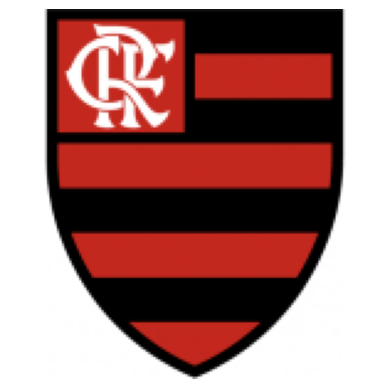

In [47]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

url = "https://sofascores.p.rapidapi.com/v1/teams/logo"

querystring = {"team_id": "5981"}

headers = {
    "X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
    "X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

# Verifica se a solicitação foi bem-sucedida (status code 200)
if response.status_code == 200:
    # Converte a resposta em um objeto de imagem
    image = Image.open(BytesIO(response.content))

    # Exibe a imagem usando Matplotlib
    plt.imshow(image)
    plt.axis('off')  # Desativa os eixos
    plt.show()
else:
    print("Erro ao obter a imagem. Código de status:", response.status_code)


In [16]:
import requests

url = "https://sofascores.p.rapidapi.com/v1/seasons/players-statistics/result"

querystring = {"unique_tournament_id":"92","seasons_statistics_type":"overall","seasons_id":"56974"}

headers = {
	"X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
	"X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data = response.json()
data_key = data['data']["interceptions"]

data_key

[{'statistics': {'interceptions': 10,
   'id': 1264835,
   'type': 'overall',
   'appearances': 1},
  'playedEnough': True,
  'player': {'name': 'Luiz Felipe de Souza Soares',
   'slug': 'de-souza-soares-luiz-felipe',
   'shortName': 'L. F. d. S. Soares',
   'position': 'D',
   'userCount': 22,
   'id': 1186781},
  'team': {'name': 'Bangu',
   'slug': 'bangu',
   'shortName': 'Bangu',
   'userCount': 0,
   'type': 0,
   'id': 1993,
   'teamColors': {'primary': '#52b030',
    'secondary': '#52b030',
    'text': '#ffffff'}}},
 {'statistics': {'interceptions': 16,
   'id': 1263364,
   'type': 'overall',
   'appearances': 2},
  'playedEnough': True,
  'player': {'name': 'Igor',
   'slug': 'igor',
   'shortName': 'Igor',
   'position': 'D',
   'userCount': 1,
   'id': 904330},
  'team': {'name': 'Audax-RJ',
   'slug': 'audax-rj',
   'shortName': 'Audax-RJ',
   'userCount': 0,
   'type': 0,
   'id': 85341,
   'teamColors': {'primary': '#52b030',
    'secondary': '#52b030',
    'text': '#ffff

In [96]:
import requests

url = "https://sofascores.p.rapidapi.com/v1/players/statistics/result"

querystring = {"unique_tournament_id":"92","player_stat_type":"overall","seasons_id":"56974","player_id":"1175553"}

headers = {
	"X-RapidAPI-Key": "b7f139b5f2mshd8d0f0154205bb9p1b60bbjsn69a174306bd1",
	"X-RapidAPI-Host": "sofascores.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json()["data"]["statistics"]["interceptions"])

0
